## I was assigned this project from [Jose Portilla's Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/)

### Data Source: [Yelp Review Data Set on Kaggle](https://www.kaggle.com/c/yelp-recsys-2013)
The goal of this project is to classify Yelp Reviews into 1 star or 5 star categories based off the text content found in the reviews. 

### Import Libraries

In [1]:
import nltk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

### Read Data

In [4]:
yelp = pd.read_csv('yelp.csv')

In [5]:
#check head method
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
#check info method
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
#check describe method
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


#### Create a new column named "text length" which shows the number of words in each column

In [8]:
yelp['text length'] = yelp.apply(lambda x: len(x['text'].split()),axis=1)

In [9]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86


### Exploratory Data Analysis

#### Use FacetGrid to create a grid of 5 histograms of text length based off of the star ratings.

In [10]:
sns.set_style("whitegrid")

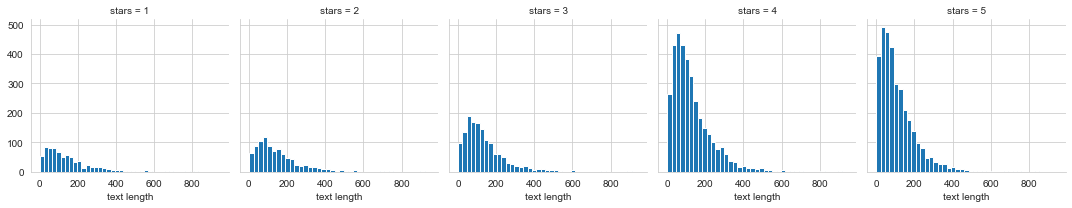

In [11]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length',bins=40)

#### Create a boxplot of text length for each star category

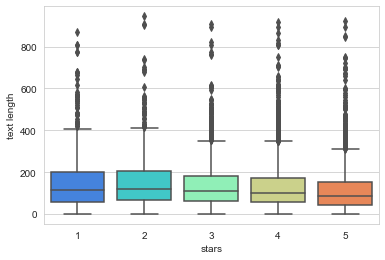

In [12]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

#### Create a countplot of the number of occurrences for each type of star rating.

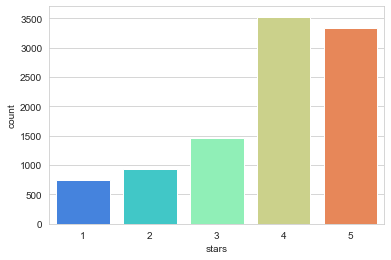

In [13]:
sns.countplot(data=yelp,x='stars',palette='rainbow')

#### Get the mean values of the numerical columns using groupby. 

In [14]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


#### Use the corr() method on the created groupby dataframe

In [15]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
text length,-0.865362,0.697506,0.847204,1.000000


#### Create a heatmap based off that .corr() dataframe

(3.9, 0.2)

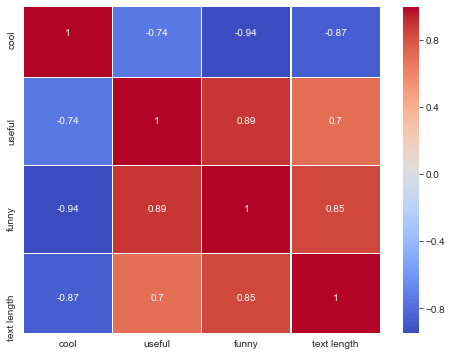

In [16]:
plt.figure(figsize=(8, 6))

ax = sns.heatmap(data=stars.corr(),annot=True,cmap='coolwarm',linewidths=.3)
ax.set_ylim( 3.9, 0.2)

### NLP Classification

#### Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [17]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [18]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


#### Create objects for features and target variables

In [19]:
x = yelp_class['text']
y = yelp_class['stars']

#### Import CountVectorizer and create CountVectorizer object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

####  Use the fit_transform method on the CountVectorizer object and pass in X which is the "text" column in yelp_class

In [21]:
x = cv.fit_transform(x)

### Split data into training and testing data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

### Train a Naive Bayes Model

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [25]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### View Predictions and Evaluate Performance of the Model

In [26]:
predictions = nb.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



### Text Processing with TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('model',MultinomialNB())
])

#### Split into training and testing data

In [32]:
x = yelp_class['text']
y = yelp_class['stars']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

#### Fit pipeline into training data

In [34]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

#### View Predictions and Evaluate Performance of the Model

In [35]:
text_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test,text_pred))
print('\n')
print(classification_report(y_test,text_pred))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Train a Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('model',RandomForestClassifier())
])

In [38]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

#### Fit pipeline into training data

In [39]:
pipeline.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

#### View Predictions and Evaluate Performance of the Model

In [40]:
rf_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[ 64 164]
 [ 17 981]]


              precision    recall  f1-score   support

           1       0.79      0.28      0.41       228
           5       0.86      0.98      0.92       998

    accuracy                           0.85      1226
   macro avg       0.82      0.63      0.66      1226
weighted avg       0.84      0.85      0.82      1226

